In [0]:
from keras.models import Sequential, Model
from keras.layers import *
from keras.optimizers import Adam
import sys
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU

In [0]:
from keras.utils.generic_utils import get_custom_objects
def swish(x):
    return (K.sigmoid(x) * x)

get_custom_objects().update({'swish': Activation(swish)})

In [0]:
rows = 28
cols = 28
channels = 1
img_shape = (28, 28, 1)
latent_dim = 100
# optimizer = Adam(0.0002, 0.5)

In [0]:
def discriminator():
        model = Sequential([
        Conv2D(64, 5, 5, subsample=(2,2), input_shape=(28,28,1), border_mode='same', activation=LeakyReLU(0.2)),
        Dropout(0.3),
        Conv2D(128, 5, 5, subsample=(2,2), border_mode='same', activation=LeakyReLU(0.2)),
        Dropout(0.3),
        Flatten(),
        Dense(1, activation='sigmoid')
        ])
        return model

In [0]:
def generator():
    model = Sequential([
    Dense(128*7*7, input_dim=100, activation='swish'),
    BatchNormalization(),
    Reshape((7,7,128)),
    UpSampling2D(),
    Conv2D(64, 5, 5, border_mode='same', activation='swish'),
    BatchNormalization(),
    UpSampling2D(),
    Convolution2D(1, 5, 5, border_mode='same', activation='tanh')
    ])
    return model


In [0]:
def train(nb_epochs = 30, batch_size = 128):
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.astype(np.float32)/127.5 - 1
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    disc = discriminator()
    gen = generator()
    # dcgan = DCGAN(gen, disc)
    gen.compile(loss = 'binary_crossentropy', optimizer = Adam(), metrics = ['accuracy'])
    # dcgan.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])
    # disc.trainable = True
    disc.compile(loss = 'binary_crossentropy', optimizer = Adam(), metrics = ['accuracy']) 
    disc.trainable = False
    ganInput = Input(shape = (100, ))
    x = gen(ganInput)
    ganOutput = disc(x)
    gan = Model(input = ganInput, output = ganOutput)
    gan.compile(loss = 'binary_crossentropy', optimizer = Adam())
    
    batch_count = X_train.shape[0] // batch_size 

    for epoch in range(nb_epochs):
#         print('Epoch Number:%d' %epoch)
        for index in tqdm(range(batch_count), file = sys.stdout):
            noise = np.random.rand(batch_size, 100)
            image_batch = X_train[np.random.randint(0, X_train.shape[0], size = batch_size)]
            predictions = gen.predict(noise, batch_size = batch_size)
            X = np.concatenate([predictions, image_batch])
            
            y_dis = [0]*batch_size + [1]*batch_size
            
            disc.trainable = True
            disc.train_on_batch(X, y_dis)
            
            noise = np.random.rand(batch_size, 100)
            y_gen = [1]*batch_size
            disc.trainable = False
            gan.train_on_batch(noise, y_gen)
            
        gen.save_weights('model/gen_50', True)
        disc.save_weights('model/disc_50', True)

In [0]:
def plot_output():
    gen = generator()
    disc = discriminator()
    gen.load_weights('model/gen_50')
    disc.load_weights('model/disc_50')  

    input = np.random.rand(100, 100)
    preds = gen.predict(input)
    plt.figure(figsize = (10, 10))
    for i in range(preds.shape[0]):
        plt.subplot(10, 10, i+1)
        plt.imshow(preds[i, :, :, 0], cmap = 'gray')
        plt.axis('off')

    plt.tight_layout() 


In [19]:
train(50, 128)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), input_shape=(28, 28, 1..., activation=<keras.lay..., strides=(2, 2), padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/keras/activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 5), activation=<keras.lay..., strides=(2, 2), padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="swish", padding="sa

  0%|          | 0/468 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`


 64%|██████▎   | 298/468 [00:23<00:13, 12.58it/s]

 80%|███████▉  | 374/468 [00:29<00:07, 12.59it/s]

 84%|████████▍ | 392/468 [00:31<00:06, 12.57it/s]

 85%|████████▍ | 396/468 [00:31<00:05, 12.58it/s]

 85%|████████▌ | 398/468 [00:31<00:05, 12.59it/s]

 85%|████████▌ | 398/468 [00:31<00:05, 12.60it/s]

 85%|████████▍ | 396/468 [00:31<00:05, 12.57it/s]

 85%|████████▌ | 398/468 [00:31<00:05, 12.58it/s]

 85%|████████▌ | 398/468 [00:31<00:05, 12.61it/s]

 85%|████████▍ | 396/468 [00:31<00:05, 12.57it/s]

 85%|████████▌ | 398/468 [00:31<00:05, 12.58it/s]

 85%|████████▌ | 398/468 [00:31<00:05, 12.58it/s]

 85%|████████▍ | 396/468 [00:31<00:05, 12.57it/s]

 85%|████████▍ | 396/468 [00:31<00:05, 12.57it/s]

 85%|████████▌ | 398/468 [00:31<00:05, 12.56it/s]

 85%|████████▌ | 398/468 [00:31<00:05, 12.58it/s]

100%|██████████| 468/468 [00:37<00:00, 12.58it/s]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="swish", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (5, 5), activation="tanh", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), input_shape=(28, 28, 1..., activation=<keras.lay..., strides=(2, 2), padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/keras/activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  

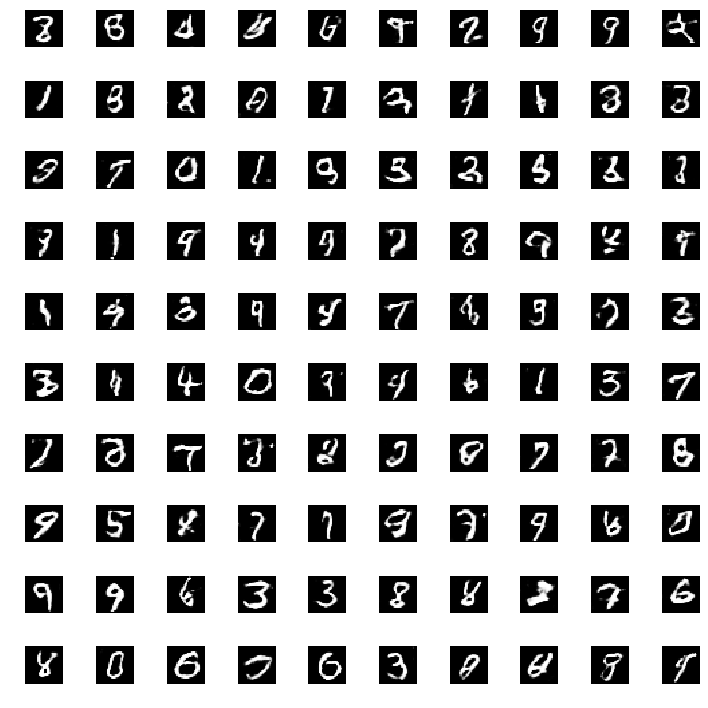

In [20]:
plot_output()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="swish", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (5, 5), activation="tanh", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), input_shape=(28, 28, 1..., activation=<keras.lay..., strides=(2, 2), padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/keras/activations.py:115: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  

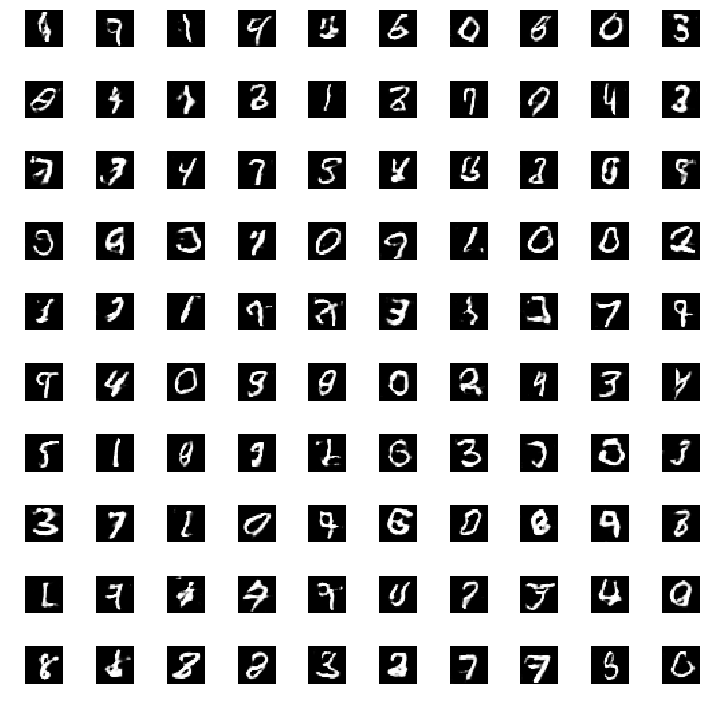

In [21]:
plot_output()